In [2]:
#i wanted to pull out the clusteres that are built into the sns clustermap quantitatively using the dendrograms
# but this exmaple: https://itecnote.com/tecnote/python-extracting-clusters-from-seaborn-clustermap/
#has some re-writing back to the beginning so im going to try that here

## 02a_temporalOutlinksHeatmap
Take in the outlink temporal inclusion dataframes and create clustered heatmaps based on temporal inclusion

import:

    00_outlinkInclusiondf_en.pkl
    00_outlinkInclusiondf_ar.pkl
    
output:

    

The Plan:
- get temporal inclusion dataframes
- plot a heatmap of a subsection of the data
- find the pairwise distances of their temporal inclusion
- plot a subection of these pairwise distances
- plot all of the pairwise distances
- cluster the outlinks by their pairwise distancs

    
Plan
1. English
2. Arabic

In [29]:
#import necessary things
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for identifying dendrograms
# from collections import defaultdict
# import pandas as pd
# from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
# from fastcluster import linkage
# import seaborn as sns
# from matplotlib.colors import rgb2hex, colorConverter

from collections import defaultdict
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
from fastcluster import linkage as flinkage
import seaborn as sns
from matplotlib.colors import rgb2hex, colorConverter


import numpy as np
# 
# import wikifunctions as wf #Brian's stuff

# from collections import Counter

# from urllib.parse import unquote


# 
# import datetime



### Functions

In [23]:
#since it's difficult to keep track of what color e.g. '
# #c13d3f' is, we make make an IPython notebook compatible HTML representation of the 
# dictionary holding the information. Objects of this class will behave just like dictionaries, 
# except for representing them as a HTML table.

#(Note that the representation uses colerConverter from matplotlib, so it supports 
#any matplotlib supported color representation, not only hex color strings.)

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'
        
        html += '</table>'
        
        return html

In [24]:
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

## 1. English

In [7]:
# with open('..Data/00_outlinkInclusiondf_en.pkl.pkl', 'rb') as f:
#     en_data = pickle.load(f)

with open('../Data/00_outlinkInclusiondf_en.pkl', 'rb') as f:
    en_data = pickle.load(f)
    
with open('../Data/02b_cosineLinks_en.pkl', 'rb') as f:
    pairDf_en = pickle.load(f)    

In [9]:
pairDf_en.head()

,15 October 2011 global protests,17 October Revolution,2000s energy crisis,2004–05 Palestinian local elections,2005 Ahvaz unrest,2005 Palestinian presidential election,2006 Palestinian legislative election,2007–2008 world food price crisis,2008 Armenian presidential election,2009 Iranian presidential election protests,...,YouTube,Youth,Youthquake,Youthquake (movement),Yoweri Museveni,Zaydism,Zeynep Tufekci,Zimbabwe,Zine El Abidine Ben Ali,Zouérat
15 October 2011 global protests,1.0000,0.0,0.0,0.0,0.3669,0.0,0.0,0.661143,0.0,0.930949,...,0.000000,0.459933,0.0,0.700067,0.0,0.000000,0.000000,0.0,0.575509,0.423659
17 October Revolution,0.0000,1.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,...,0.438086,0.000000,0.0,0.000000,0.0,0.462042,0.472789,0.0,0.347878,0.000000
2000s energy crisis,0.0000,0.0,1.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,...,0.100504,0.000000,0.0,0.000000,0.0,0.106000,0.108465,0.0,0.079809,0.000000
2004–05 Palestinian local elections,0.0000,0.0,0.0,1.0,0.0000,1.0,1.0,0.164399,0.0,0.129099,...,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,1.0,0.079809,0.000000
2005 Ahvaz unrest,0.3669,0.0,0.0,0.0,1.0000,0.0,0.0,0.434959,0.0,0.341565,...,0.000000,0.000000,0.0,0.460566,0.0,0.000000,0.000000,0.0,0.211154,0.577350


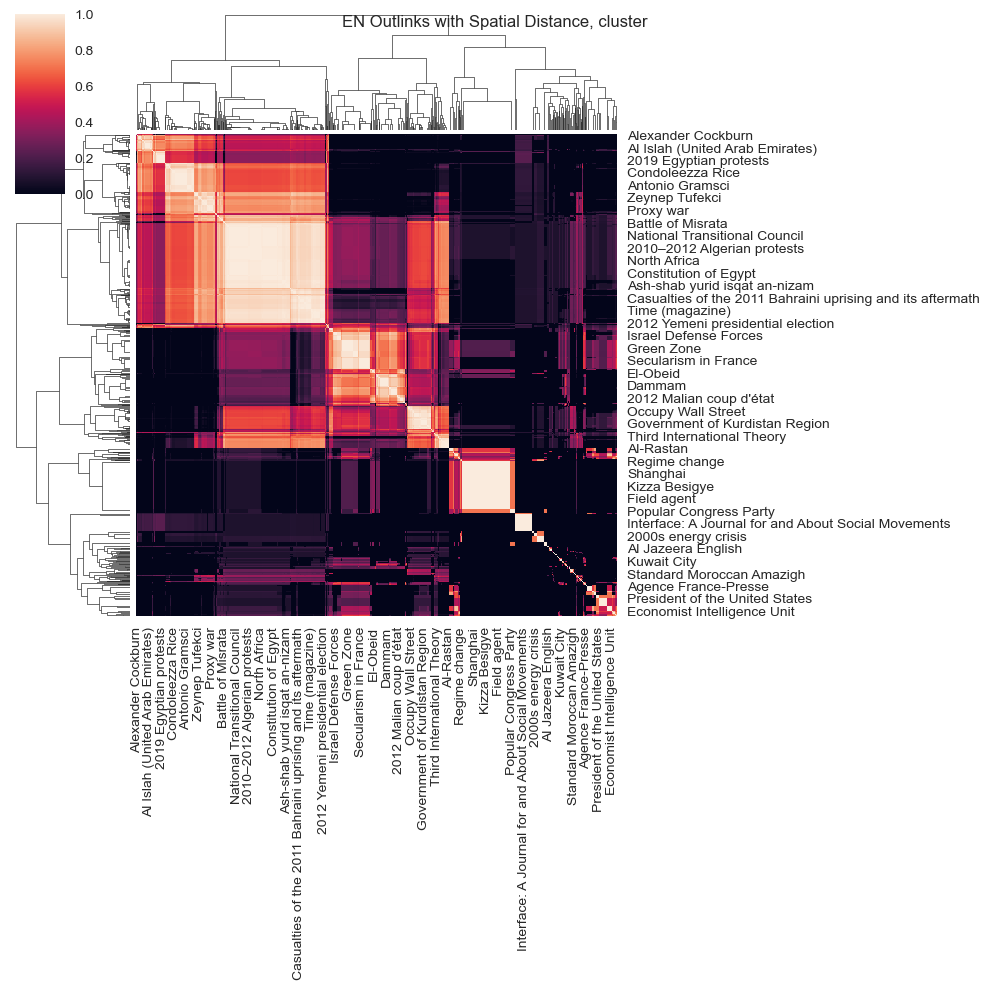

In [44]:
#plot cluster plot
clusterPlt = sns.clustermap(pairDf_en)
clusterPlt.fig.suptitle("EN Outlinks with Spatial Distance, cluster")
clusterPlt

In [31]:
dgram = clusterPlt.dendrogram_col.dendrogram
D = np.array(dgram['dcoord'])
I = np.array(dgram['icoord'])

# then the root node will be the last entry, and the length of the L/R branches will be
yy = D[-1] 
lenL = yy[1]-yy[0]
lenR = yy[2]-yy[3]

In [33]:
clusterPlt.dendrogram_col.linkage


array([[   0.        ,  567.        ,    0.        ,    2.        ],
       [   2.        ,  124.        ,    0.        ,    2.        ],
       [   3.        ,    5.        ,    0.        ,    2.        ],
       ...,
       [1684.        , 1686.        ,   10.13289543,  296.        ],
       [1689.        , 1690.        ,   11.61556555,  507.        ],
       [1688.        , 1691.        ,   14.07933353,  847.        ]])

In [34]:
clusterPlt.dendrogram_row.linkage

array([[   0.        ,  567.        ,    0.        ,    2.        ],
       [   2.        ,  124.        ,    0.        ,    2.        ],
       [   3.        ,    5.        ,    0.        ,    2.        ],
       ...,
       [1684.        , 1686.        ,   10.13289543,  296.        ],
       [1689.        , 1690.        ,   11.61556555,  507.        ],
       [1688.        , 1691.        ,   14.07933353,  847.        ]])

In [55]:
# https://stackoverflow.com/questions/64867426/is-there-a-way-to-get-display-save-the-dendrograms-and-heatmap-created-using-sea

fig = clusterPlt.fig
for ax, filename in zip([clusterPlt.ax_col_dendrogram, clusterPlt.ax_row_dendrogram, clusterPlt.ax_heatmap],
                        ['col_dendrogram', 'row_dendrogram', 'heatmap']):
    extent = ax.get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
#     fig.savefig(f'trial.png', bbox_inches=extent)
    extent.plot()

AttributeError: 'Bbox' object has no attribute 'plot'

TypeError: float() argument must be a string or a number, not 'Figure'

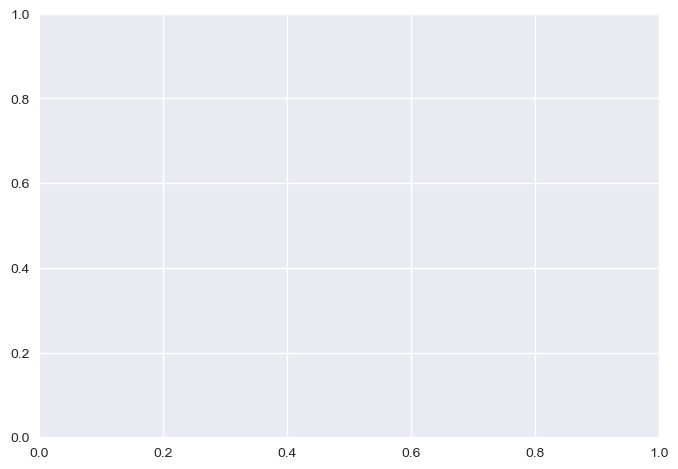

In [61]:
plt.plot(fig)

In [65]:
# https://stackoverflow.com/questions/66676486/how-to-show-y-axis-to-clustermap-python-dendrogram
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator
import seaborn as sns
from scipy.cluster import hierarchy

den = hierarchy.dendrogram(clusterPlt.dendrogram_col.linkage, labels=pairDf_en.columns,
                           color_threshold=35, distance_sort=True, ax=clusterPlt.ax_col_dendrogram)
clusterPlt.ax_col_dendrogram.axis('on')
# sns.despine(ax=g.ax_col_dendrogram, left=False, right=True, top=True, bottom=True)
# clusterPlt.ax_col_dendrogram.yaxis.set_major_locator(MaxNLocator())
# clusterPlt.ax_col_dendrogram.yaxis.set_major_formatter(ScalarFormatter())
# clusterPlt.ax_col_dendrogram.grid(axis='y', ls='--', color='grey')
# g.ax_col_dendrogram.yaxis.tick_right()
plt.show()

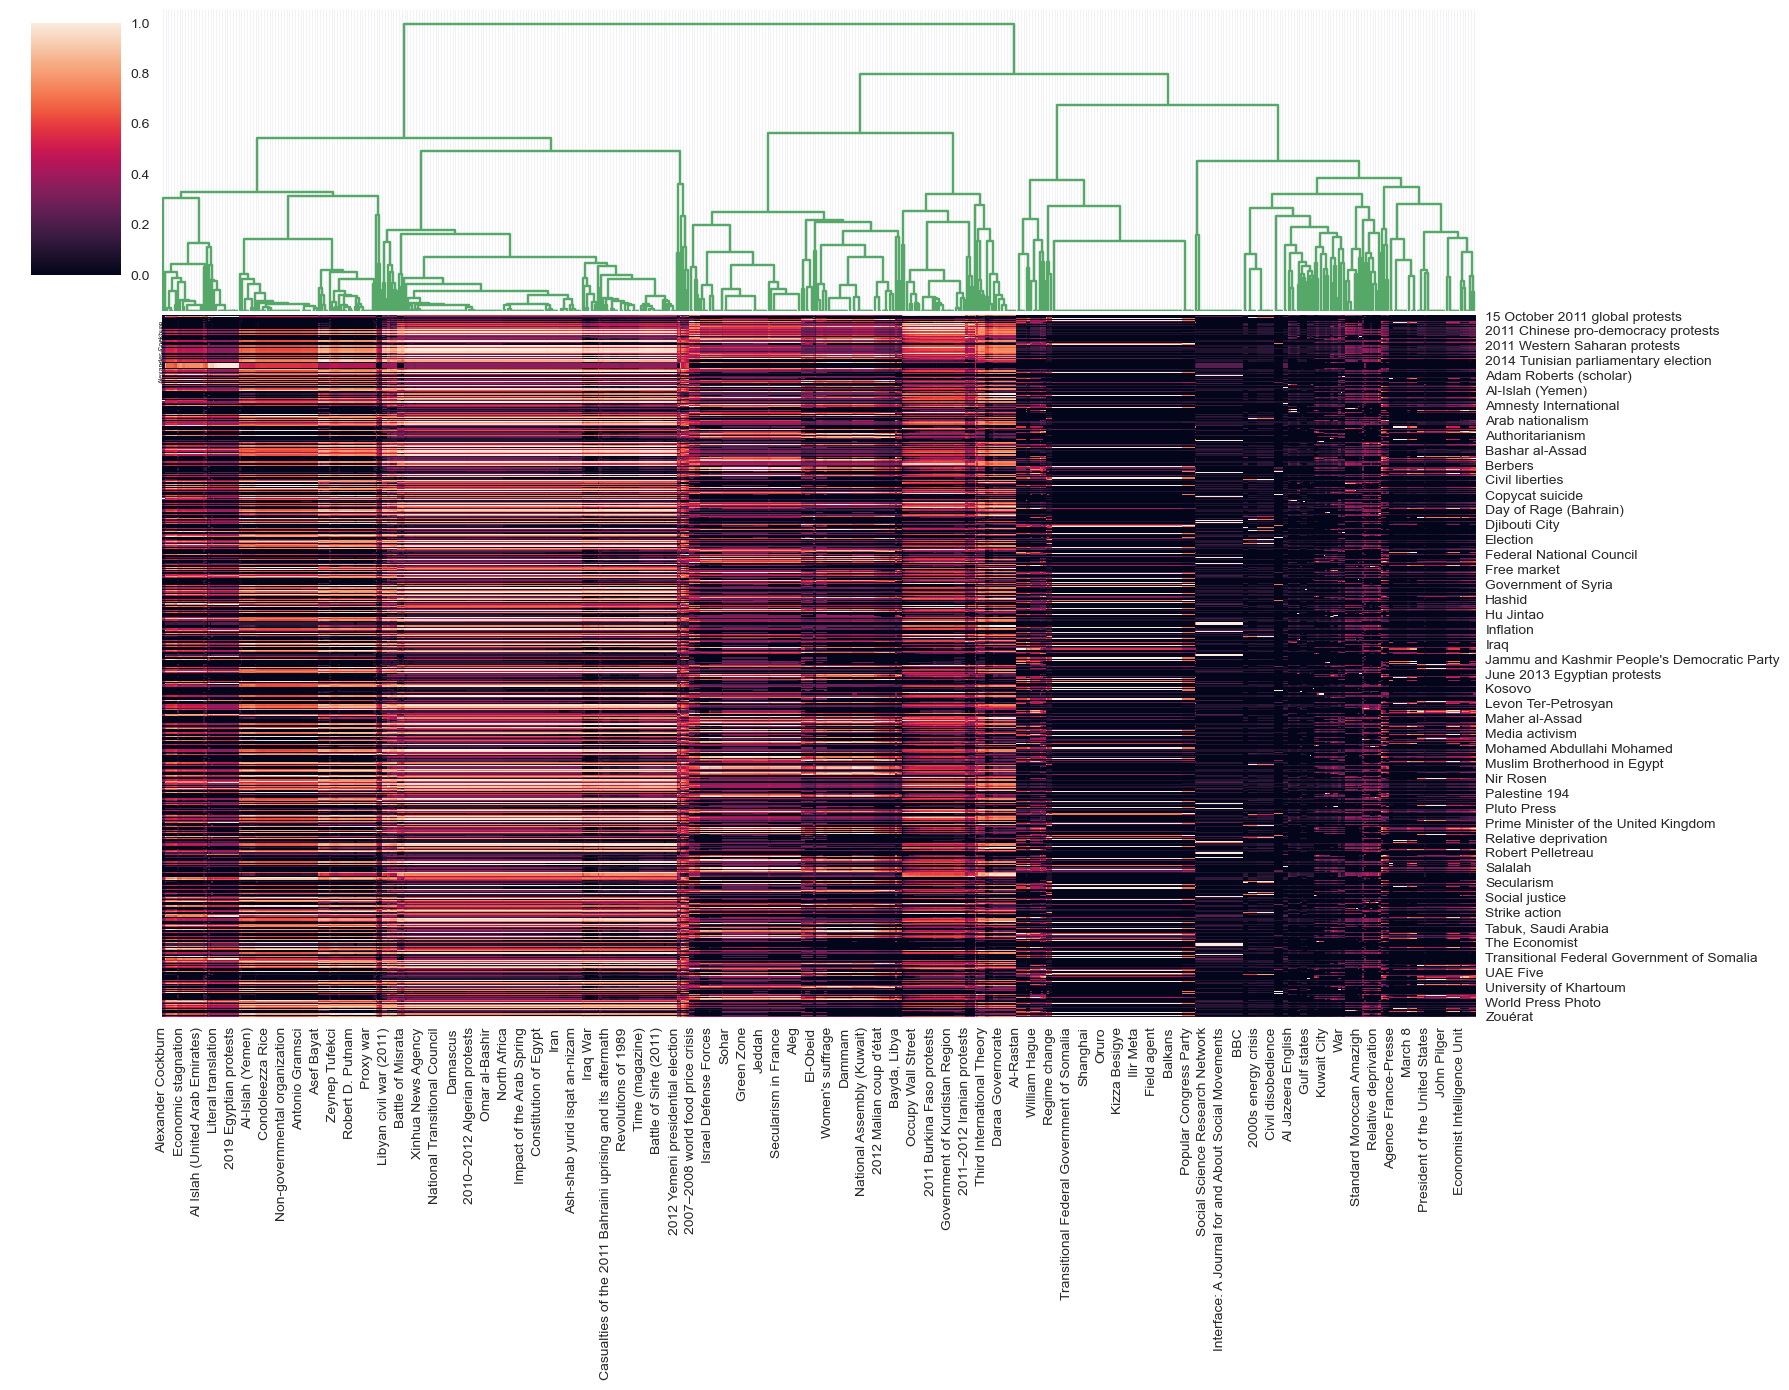

In [68]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator
import seaborn as sns
from scipy.cluster import hierarchy

# iris = sns.load_dataset("iris")
# species = iris.pop("species")
g = sns.clustermap(pairDf_en, row_cluster=False, figsize=(18, 14), dendrogram_ratio=(.1, .3))
den = hierarchy.dendrogram(g.dendrogram_col.linkage, labels=pairDf_en.columns,
                           color_threshold=35, distance_sort=True, ax=g.ax_col_dendrogram)
g.ax_col_dendrogram.axis('on')
# sns.despine(ax=g.ax_col_dendrogram, left=False, right=True, top=True, bottom=True)
# g.ax_col_dendrogram.yaxis.set_major_locator(MaxNLocator())
# g.ax_col_dendrogram.yaxis.set_major_formatter(ScalarFormatter())
# g.ax_col_dendrogram.grid(axis='y', ls='--', color='grey')
# g.ax_col_dendrogram.yaxis.tick_right()
plt.show()

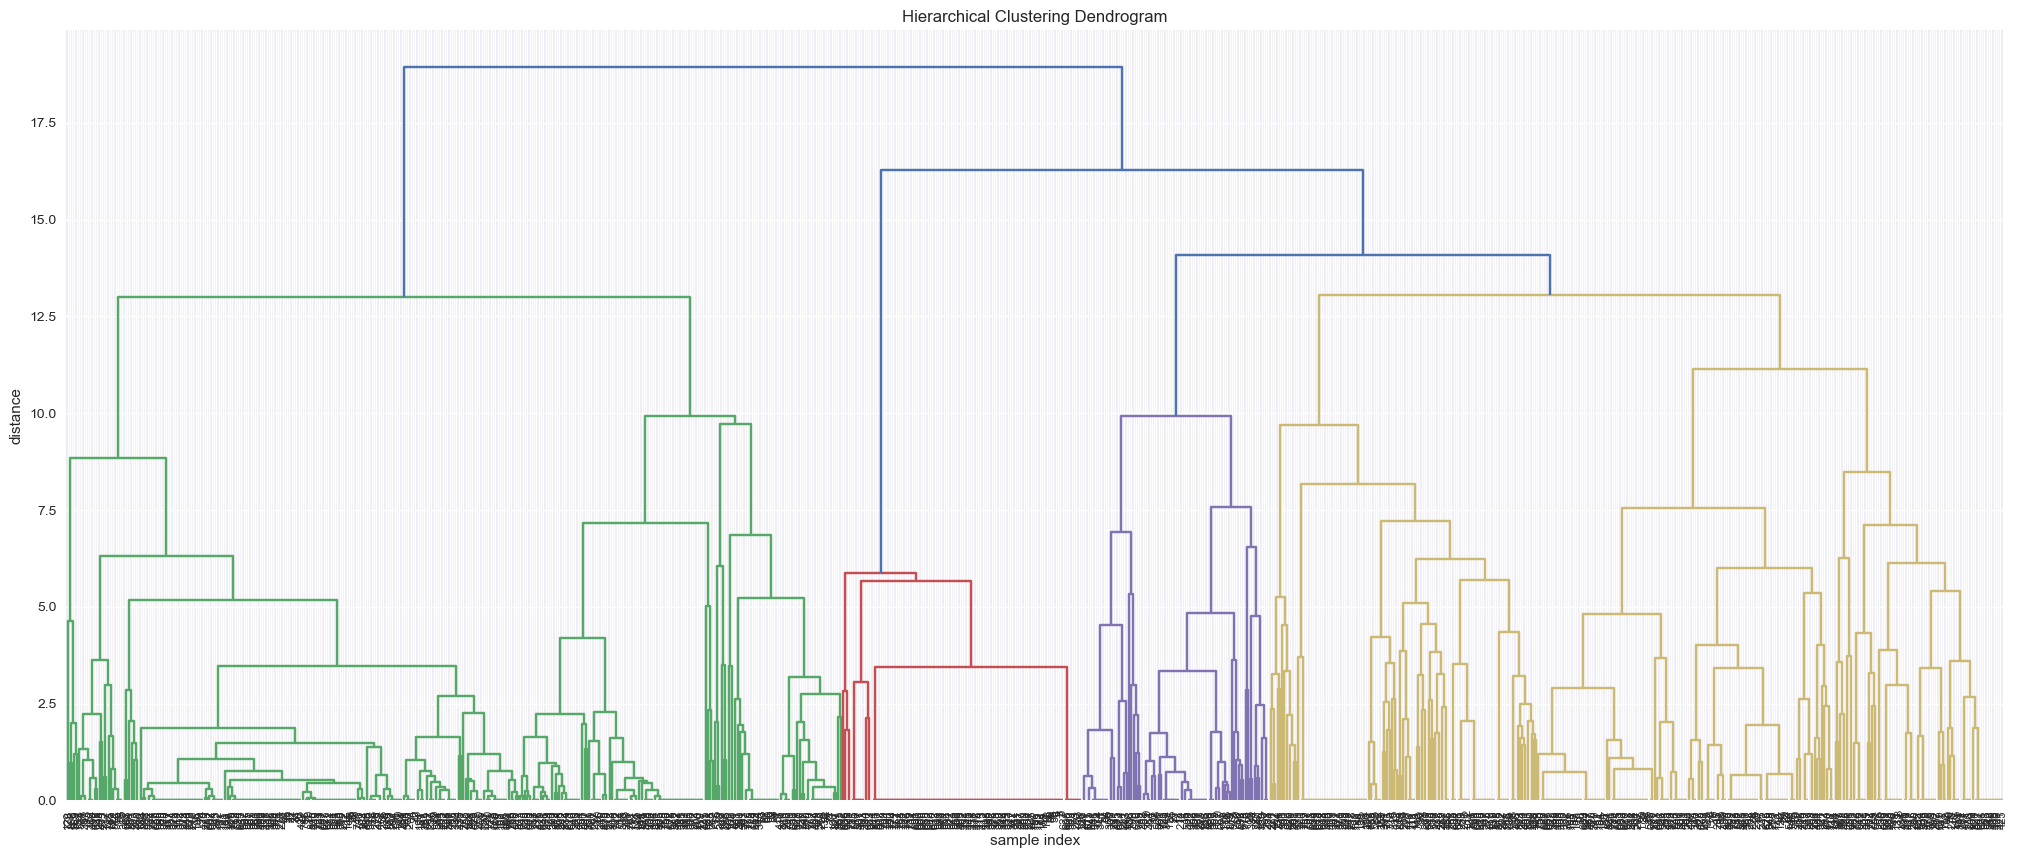

In [41]:
#https://stackoverflow.com/questions/67277384/i-dont-understand-the-detailed-behavior-of-the-threshold-working-in-fcluster-m
#going to have to still qualitatively look at these but this helps pull out wha tit identified

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(pairDf_en, method='complete')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.show()

# Trial 1

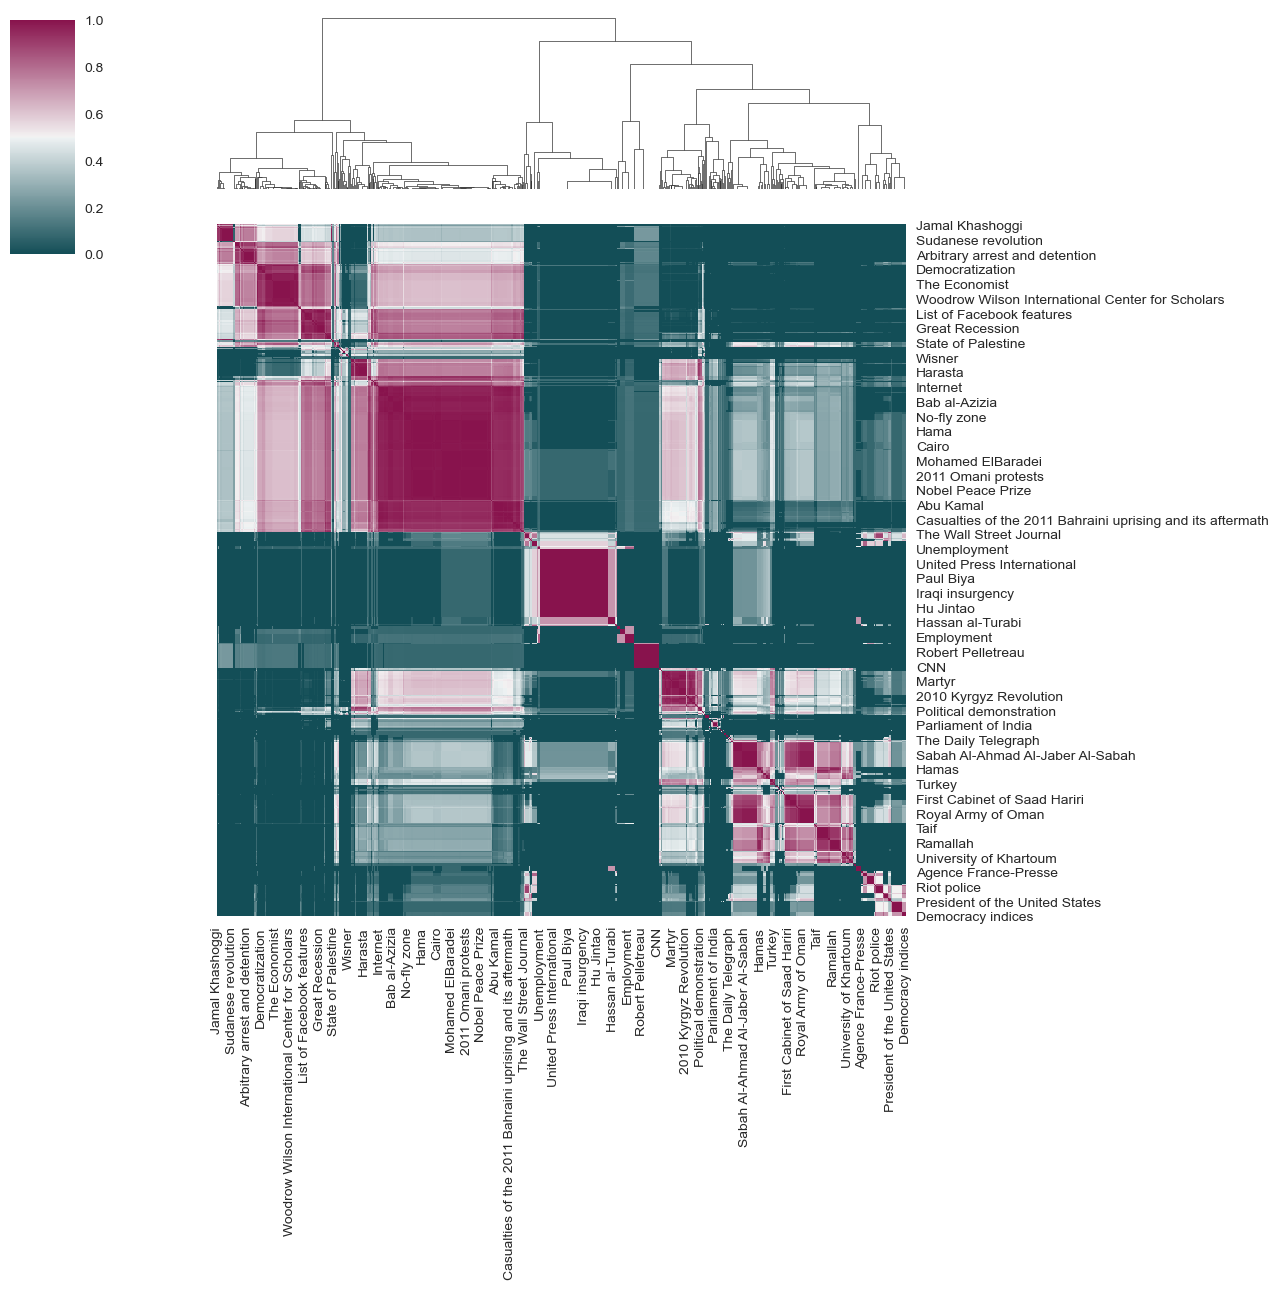

In [42]:
#the new cluster map
#https://itecnote.com/tecnote/python-extracting-clusters-from-seaborn-clustermap/

from scipy.cluster import hierarchy


network_pal = sns.cubehelix_palette(len(pairDf_en),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, pairDf_en), network_pal))

#networks = pairDf_en.columns.get_level_values("network")
network_colors = pd.Series(pairDf_en.all()).map(network_lut)

cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)


#this is the main thing i want to attain ############################
correlations = pairDf_en.corr()
correlations_array = np.asarray(pairDf_en.corr())

row_linkage = hierarchy.linkage(
    pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    pdist(correlations_array.T), method='average')
########################################################################

g = sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage, row_colors=network_colors, method="average",
               col_colors=network_colors, figsize=(13, 13), cmap=cmap)

g.ax_row_dendrogram.remove()

In [8]:
correlations_array

array([[ 1.        , -0.10214482, -0.33960575, ..., -0.33960575,
         0.62027283,  0.55106144],
       [-0.10214482,  1.        , -0.14342705, ..., -0.14342705,
         0.11572493, -0.24104478],
       [-0.33960575, -0.14342705,  1.        , ...,  1.        ,
        -0.41347549, -0.23795668],
       ...,
       [-0.33960575, -0.14342705,  1.        , ...,  1.        ,
        -0.41347549, -0.23795668],
       [ 0.62027283,  0.11572493, -0.41347549, ..., -0.41347549,
         1.        ,  0.09755815],
       [ 0.55106144, -0.24104478, -0.23795668, ..., -0.23795668,
         0.09755815,  1.        ]])

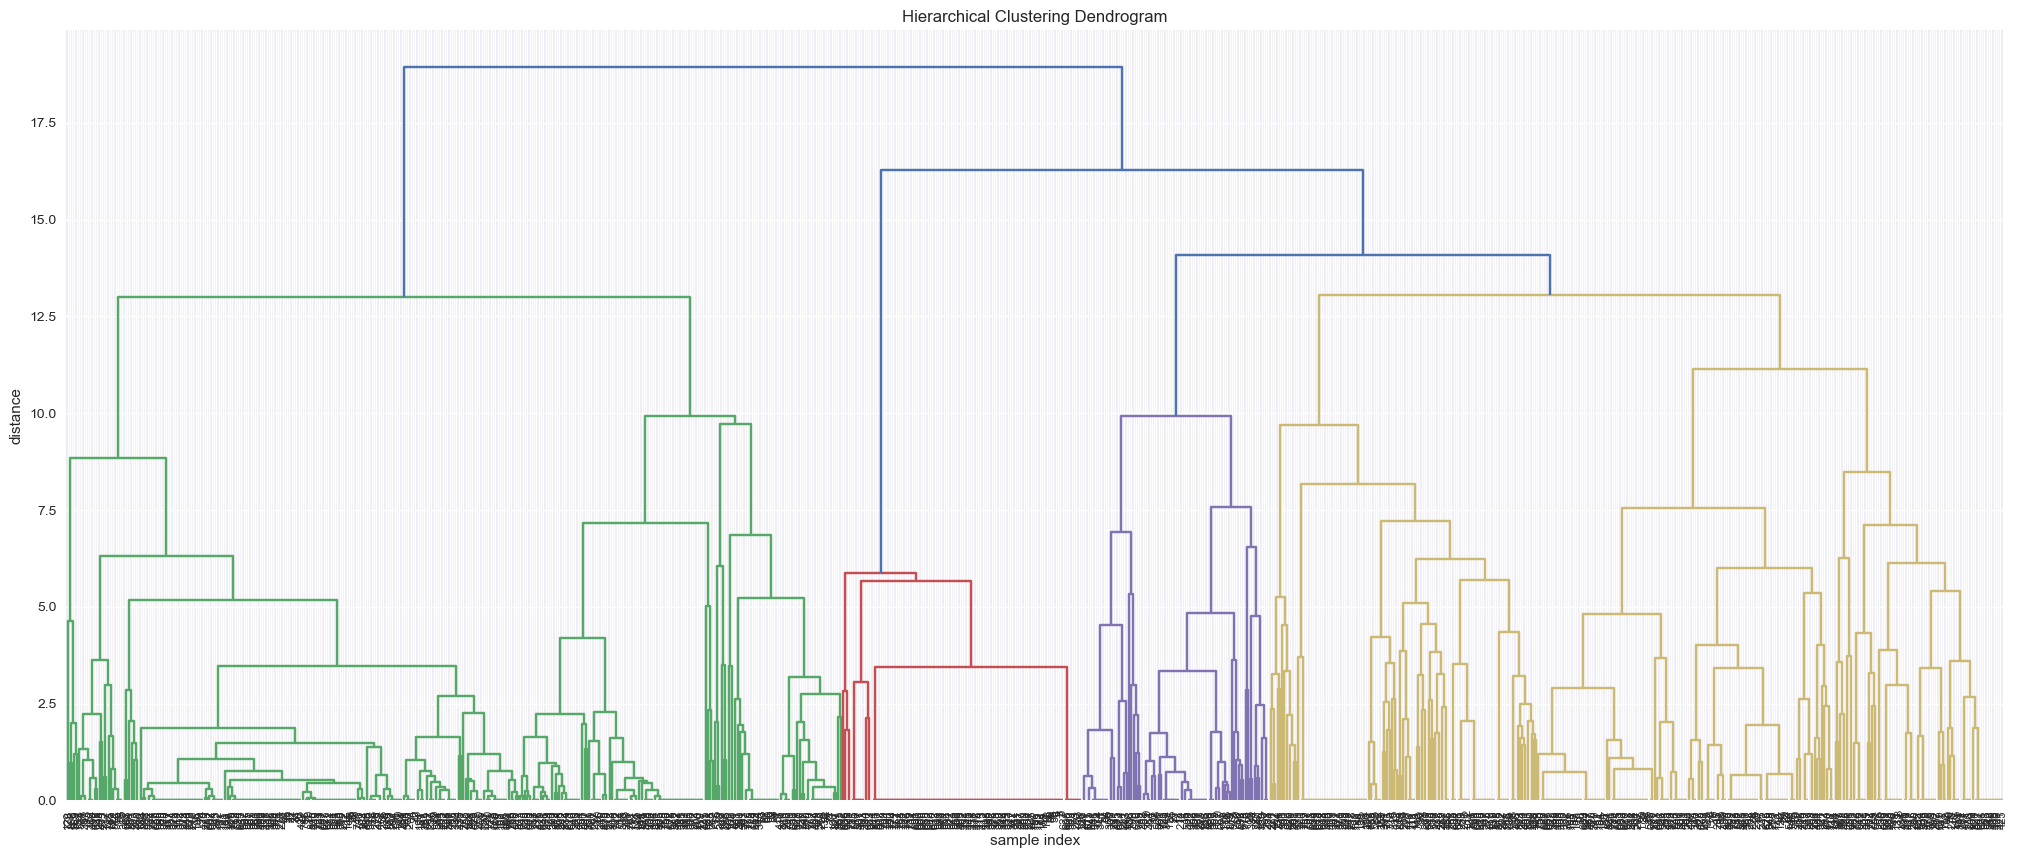

In [43]:
#https://stackoverflow.com/questions/67277384/i-dont-understand-the-detailed-behavior-of-the-threshold-working-in-fcluster-m
#going to have to still qualitatively look at these but this helps pull out wha tit identified

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(pairDf_en, method='complete')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

#plt.axhline(9, color='k', ls='--'); #9 is a threshold

In [27]:
# fcluster(row_linkage, 12, criterion='distance')

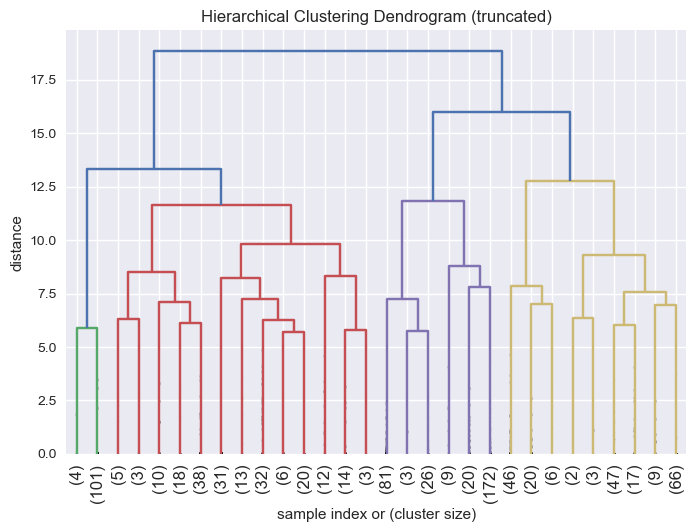

In [10]:
#this shows a truncated dendrogram, which only shows the last p=12 out of our 149 merges.



plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()


# Second Try

In [30]:
#https://nbviewer.org/gist/vals/150ec97a5b7db9c82ee9

In [11]:
from collections import defaultdict
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
from fastcluster import linkage
import seaborn as sns
from matplotlib.colors import rgb2hex, colorConverter

In [12]:
#set some prettier non-default colors.

sns.set_palette('Set1', 10, 0.65)
palette = sns.color_palette()
#set_link_color_palette(map(rgb2hex, palette))
sns.set_style('white')

In [13]:
#from scipy.spatial.distance import pdist
# from scipy.spatial.distance import squareform

# squareform(pdist(en_data.loc[:]))
# pairDf_en = 1 - pd.DataFrame( squareform(pdist(en_data.loc[:], metric='cosine')),
#     columns = en_data.index,
#     index = en_data.index
# )



In [14]:
#"linkage” function andits siblings in the scipy.cluster.hierarchy module.

#link = linkage(df, metric='correlation', method='ward')

#description of fastcluster: https://github.com/cran/fastcluster/blob/master/src/python/fastcluster.py
# i think that r'''Hierarchical, agglomerative clustering on a dissimilarity matrix or on
# Euclidean data.
# Apart from the argument 'preserve_input', the method has the same input
# parameters and output format as the functions of the same name in the
# module scipy.cluster.hierarchy.

#that is: A condensed distance matrix. A condensed distance matrix is a flat array 
# containing the upper triangular of the distance matrix. This is the form that pdist returns. 

In [45]:
#method - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

#link = linkage(pairDf_en, metric='cosine', method='single')
link = linkage(en_data.loc[:], metric='cosine', method='average')

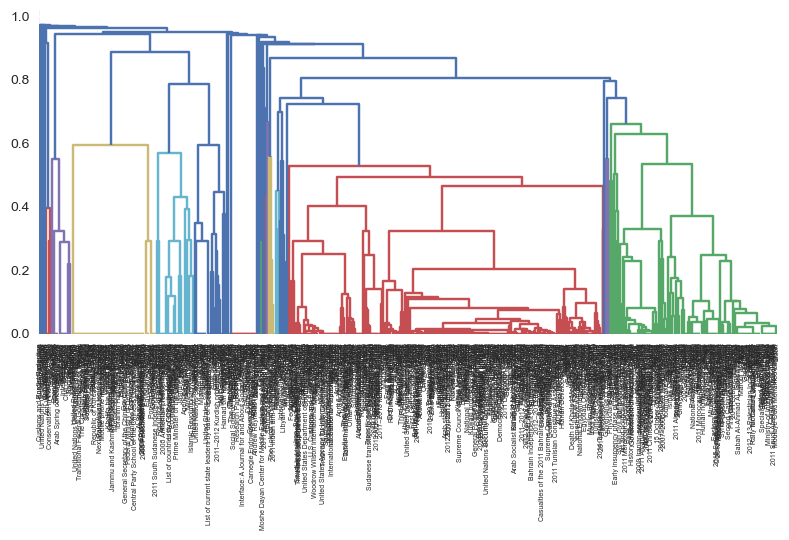

In [47]:
# plt.figsize(8, 5)
den = dendrogram(link, labels=pairDf_en.index)#, abv_threshold_color='#AAAAAA')
plt.xticks(rotation=90)
no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sns.despine(**no_spine);

plt.tight_layout()
#plt.savefig('tree1.png');

In [48]:
# The tree is represented as a collection of ∏ shaped components.
# The three items named 'color_list', 'dcoord', 'icoord' indexes these ∏'s

# The coordinates go from left to right. So for the red ∏, the 'legs' are located at 15 and 25, 
# while the grey one has legs at 5 and 20.

# The apperant pattern is that legs positioned at leaves will end with 4 or 5. The reason is to nicely 
# place the leg at the middle of the corresponding leaf index value. This also implies the actual 
# list indices of the leaf are multiplied by 10.


den

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [115.0, 115.0, 125.0, 125.0],
  [83.75, 83.75, 120.0, 120.0],
  [65.0, 65.0, 101.875, 101.875],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [165.0, 165.0, 184.375, 184.375],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [285.0, 285.0, 303.75, 303.75],
  [275.0, 275.0, 294.375, 294.375],
  [265.0, 265.0, 284.6875, 284.6875],
  [255.0, 255.0, 274.84375, 274.84375],
  [245.0, 245.0, 264.921875, 264.921875],
  [235.0, 235.0, 254.9609375, 254.9609375],
  [225.0, 225.0, 244.98046875, 244.98046875],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [234.990234375, 234.990234375, 343.75, 343.75],
  [174.6875, 174.6875, 2

In [49]:
# We first subtract 5 from each colors icoord, then divide by 10. 
# If the resulting number is close to the closest integer, we consider 
# this to be an index for a leaf. If the resulting number is not close 
# to an integer index, it means the colored tree we got it from is from non-leaf parts of the trees.

# For each leaf, we add it to a list per color in a dictionary.
cluster_idxs = defaultdict(list)
for c, pi in zip(den['color_list'], den['icoord']):
    for leg in pi[1:3]:
        i = (leg - 5.0) / 10.0
        if abs(i - int(i)) < 1e-5:
            cluster_idxs[c].append(int(i))

In [50]:
cluster_idxs

defaultdict(list,
            {'C1': [3,
              4,
              254,
              255,
              253,
              654,
              655,
              657,
              658,
              656,
              661,
              662,
              660,
              663,
              664,
              659,
              667,
              668,
              666,
              665,
              673,
              674,
              672,
              684,
              685,
              683,
              682,
              681,
              680,
              679,
              678,
              677,
              676,
              675,
              686,
              687,
              689,
              690,
              688,
              692,
              693,
              700,
              701,
              699,
              698,
              697,
              696,
              695,
              694,
              702,
              703,
           

In [20]:
# Next we need to grab the labels of the leaves given the indexes. 
# But before we do that, since it's difficult to keep track of what color e.g. '
# #c13d3f' is, we make make an IPython notebook compatible HTML representation of the 
# dictionary holding the information. Objects of this class will behave just like dictionaries, 
# except for representing them as a HTML table.

#(Note that the representation uses colerConverter from matplotlib, so it supports 
#any matplotlib supported color representation, not only hex color strings.)

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'
        
        html += '</table>'
        
        return html

In [21]:
#go through the list of indices and fetch labels.

cluster_classes = Clusters()
for c, l in cluster_idxs.items():
    i_l = [den['ivl'][i] for i in l]
    cluster_classes[c] = i_l

In [65]:
cluster_classes

{'C1': ['Adam Roberts (scholar)',
  'Andrew Reynolds (political scientist)',
  'Armed Forces & Society',
  'BBC',
  'CNN',
  'Carnegie Endowment for International Peace',
  'Council on Foreign Relations',
  'Der Spiegel',
  'Digital object identifier',
  'Financial Times',
  'Foreign Affairs',
  'Hürriyet Daily News',
  'ISBN',
  'Interface: A Journal for and About Social Movements',
  'International Standard Serial Number',
  'Jack Goldstone',
  'Jadaliyya',
  'Peer review',
  'Pluto Press',
  'Qantara.de',
  'Research Papers in Economics',
  'Robert Pelletreau',
  'Robert Struble Jr.',
  'Ruaridh Arrow',
  'Semantic Scholar',
  'Social Science Research Network',
  'The Guardian',
  'The National (Abu Dhabi)',
  'The New York Times',
  'Timothy Garton Ash',
  'Reuters',
  'Douma, Syria',
  'Secularism',
  'Tunis',
  'Civil disobedience',
  'Defection',
  'Election',
  'Employment',
  'Internet activism',
  'Kleptocracy',
  'Protest camp',
  'Sectarianism',
  'Sit-in',
  'Strike action',
  'Urban warfare',
  '2000s energy crisis',
  'Arab Spring concurrent incidents',
  'Demographic trap',
  'Economic freedom',
  'Mutiny',
  'Silent protest',
  'Modernization theory',
  'Relative deprivation',
  'Fouad Hussein',
  'Palestinian territories',
  'Somalia',
  "Coup d'état",
  'Islah',
  'Second Libyan Civil War',
  'Baba Amr',
  'Interventionism (politics)',
  'Kurdish languages',
  'Middle East',
  'Palestinian National Authority',
  'Standard of living',
  'Abdelaziz Bouteflika',
  'Muslim Brotherhood',
  'State of Palestine',
  'Human Development Index',
  'Oman',
  'Hezbollah',
  'Lebanon',
  'Mauritania',
  'Bahrain',
  'Facebook',
  'Khuzestan province',
  'Battle of Misrata',
  'Omar Suleiman',
  '2011 Bahraini uprising',
  '2011 Iraqi protests',
  '2011 Omani protests',
  '2011–2012 Mauritanian protests',
  '2011–2012 Moroccan protests',
  '2011–2012 Saudi Arabian protests',
  '2011–2013 Sudanese protests',
  'Abdullah II of Jordan',
  'Civil resistance',
  'Damascus',
  'Elections in Yemen',
  "General People's Congress (Yemen)",
  'Human rights',
  'Human rights in Bahrain',
  'Iraq',
  'King of Bahrain',
  'Kuwaiti protests (2011–2012)',
  'Laayoune',
  'Manama',
  'Muammar Gaddafi',
  'National Transitional Council',
  'Nobel Peace Prize',
  'Nouri al-Maliki',
  'Pearl Roundabout',
  'Political corruption',
  'Political freedom',
  'Revolutionary wave',
  'Riyadh',
  'Sidi Bouzid',
  'State of emergency',
  'Supreme Council of the Armed Forces',
  'Xinhua News Agency',
  'Benghazi',
  '2010–2012 Algerian protests',
  '2011 Egyptian revolution',
  'Tunisian Revolution',
  '2011–2012 Jordanian protests',
  '2012 Egyptian presidential election',
  'Al-Hasakah',
  'Ali Abdullah Saleh',
  'Arab states of the Persian Gulf',
  'Constitution of Yemen',
  'Hosni Mubarak',
  'Human rights in Yemen',
  'Mohamed Bouazizi',
  'Mohamed ElBaradei',
  'Omar al-Bashir',
  'Parliament of Egypt',
  'Sanaa',
  'Saudi Arabia',
  'Self-immolation',
  'Social media',
  'Sudan',
  'Tawakkol Karman',
  'Yemeni Revolution',
  'Zine El Abidine Ben Ali',
  'Jordan',
  'Algeria',
  'Egypt',
  'Syria',
  'Tahrir Square',
  'Bashar al-Assad',
  'Tripoli',
  'United States diplomatic cables leak',
  'Abdrabbuh Mansur Hadi',
  'Essam Sharaf',
  'Hashid',
  'Prime Minister of Egypt',
  'Gulf of Sidra',
  'Libyan Desert',
  '2011 Western Saharan protests',
  'Hamad bin Isa Al Khalifa',
  'Ajdabiya',
  'Battle of Brega–Ajdabiya road',
  'Brega',
  'First Gulf of Sidra offensive',
  'Misrata',
  'No-fly zone',
  'Ash-shab yurid isqat an-nizam',
  '2011 military intervention in Libya',
  'United Nations Security Council Resolution 1973',
  '2011 Djiboutian protests',
  'Aden',
  'Aleppo',
  'Beji Caid Essebsi',
  'Constitution of Egypt',
  'Daraa',
  'Deir ez-Zor',
  'Democratic Constitutional Rally',
  'Emergency law in Egypt',
  'Freedom of speech',
  'Gafsa',
  'Gdeim Izik protest camp',
  'Gulf Cooperation Council',
  'Habitability',
  'Hama',
  'Impac

In [66]:
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

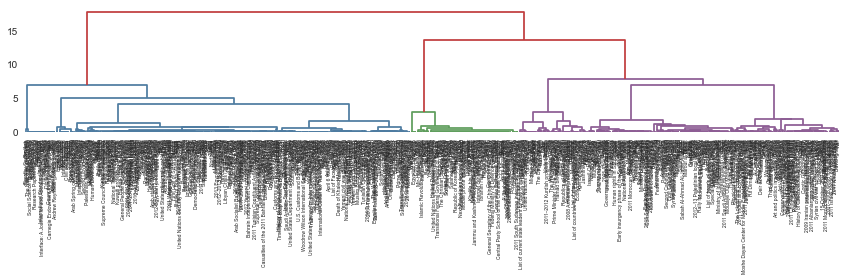

In [69]:
figsize(12, 4)
den = dendrogram(link, labels=pairDf_en.index)#, abv_threshold_color='#AAAAAA')
plt.xticks(rotation=90)
sns.despine(**no_spine);

plt.tight_layout()
#plt.savefig('tree2.png');

In [96]:
get_cluster_classes(Z)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

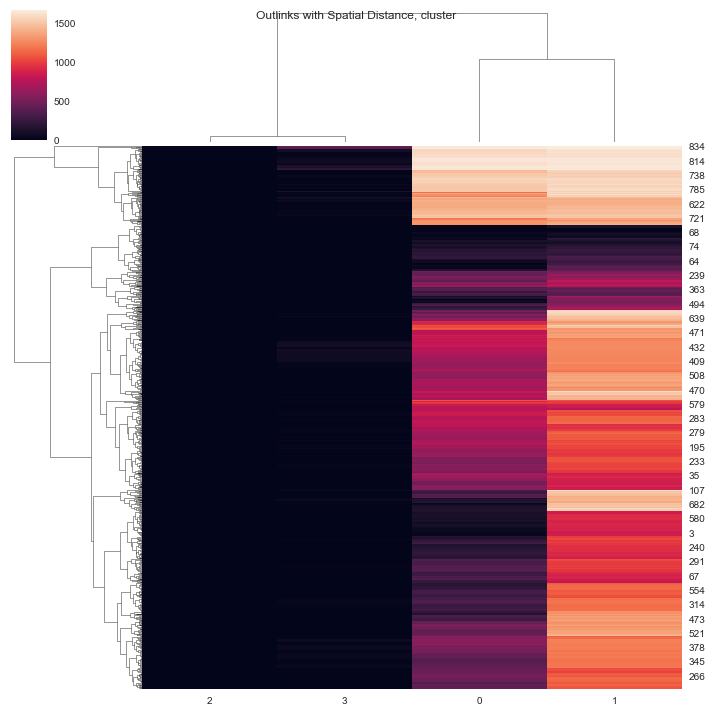

In [91]:
clusterPlt = sns.clustermap(Z)
clusterPlt.fig.suptitle("Outlinks with Spatial Distance, cluster")
# clusterPlt.savefig("03out_spatialOutlink_cluster.png")

clusterPlt

In [3]:
everything = wf.get_all_page_revisions('Arab Spring')

In [25]:

# 2014-05-31
# 2021-04-30 - send spike in clusdter 4
# 2022-12-31 - last spike in cluster 4

# Ensure df['date'] is a Series with dtype datetime64[ns]:
everything['timestamp'] = pd.to_datetime(everything['timestamp'])  

startdate = pd.to_datetime("2022-11-30").date()
enddate = pd.to_datetime("2023-01-05").date()

#greater than the start date and smaller than the end date
mask = (everything['date'] > startdate) & (everything['date'] <= enddate)

df = everything.loc[mask]

In [26]:
#get the revid and time and get the outlinks in each revid
df2 = pd.DataFrame()

df2['revid'] = df['revid']
df2['time'] = df['timestamp']

df2.head()

,revid,time
9802,1124986313,2022-12-01 16:13:46+00:00
9803,1124986560,2022-12-01 16:15:21+00:00
9804,1126196106,2022-12-08 01:43:19+00:00
9805,1126326407,2022-12-08 19:19:25+00:00
9806,1130279099,2022-12-29 11:58:49+00:00


In [27]:
from tqdm import tqdm
revLinksDict = {}

for i in tqdm(df2['revid']):
    outlinks = wf.get_revision_outlinks(i)
    outlinks_clean = wf.resolve_redirects(outlinks)
    revLinksDict[i] = outlinks_clean

100%|█████████████████████████████████████████████| 8/8 [01:03<00:00,  7.95s/it]


In [28]:
revLinksDict
# 1124986313
# 1124986313

{1124986313: ['Algeria',
  'Arabic',
  'Libya',
  'Lebanon',
  'Morocco',
  'Oman',
  'Sudan',
  'Hosni Mubarak',
  'Muammar Gaddafi',
  'Arab world',
  'Ali Abdullah Saleh',
  'State of Palestine',
  'Power vacuum',
  'Saudi Arabia',
  'Yemen',
  'Zine El Abidine Ben Ali',
  'Syrian pound',
  'Rebellion',
  'Insurgency',
  'Southern Provinces',
  'Literal translation',
  'Economic stagnation',
  'Syria',
  'Kuwait',
  'Iraq',
  'Jordan',
  'Facebook',
  'Egypt',
  'Revolutions of 1848',
  'Djibouti',
  'Mauritania',
  'Bahrain',
  'Nonviolent resistance',
  'Authoritarianism',
  'Tunisian Revolution',
  'Syrian civil war',
  'Egyptian Crisis (2011–2014)',
  'Ash-shab yurid isqat an-nizam',
  "2013 Egyptian coup d'état",
  'Post-coup unrest in Egypt (2013–2014)',
  'Arab Winter',
  'Counter-revolutionary',
  'Libyan Crisis (2011–present)',
  'Yemeni Crisis (2011–present)',
  'Yemeni civil war (2014–present)',
  'Timeline of terrorism in Egypt (2013–present)',
  'Second Arab Spring',
  

In [29]:
df2.loc[df2['revid'] == 1124986313] #2021-04-06 20:17:35+00:00
# df2.loc[df2['revid'] == 605463097] #2014-04-23 14:57:13+00:00
# 605463097


,revid,time
9802,1124986313,2022-12-01 16:13:46+00:00
